In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras import layers
import matplotlib.cm as cm
import random
import glob
import os
from skimage.segmentation import chan_vese
import numpy as np
import PIL 
from PIL import Image 
from tensorboard.plugins.hparams import api as hp
import pandas as pd
from shutil import copy
import cv2

# Display
# from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# My functions
import my_functions as mf

# tf explain
from tf_explain.callbacks.grad_cam import GradCAMCallback

In [7]:
from tf_explain.core import GradCAM

In [2]:
random_seed = 42

In [3]:
batch_size = 32
img_height = 180
img_width = 180
image_size = (img_height, img_width)

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
   'datasets/ct_scan_8/train',
   labels='inferred',
   label_mode='int',
   class_names=None,
   color_mode='rgb',
   batch_size=batch_size,
   image_size=image_size,
   shuffle=True, 
   seed=random_seed, 
   interpolation='bilinear',
   follow_links=False,
   crop_to_aspect_ratio=False)

Found 13993 files belonging to 2 classes.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
   'datasets/ct_scan_3/val',
   labels='inferred',
   label_mode='int',
   class_names=None,
   color_mode='rgb',
   batch_size=batch_size,
   image_size=image_size,
   shuffle=True, 
   seed=random_seed,
   interpolation='bilinear',
   follow_links=False,
   crop_to_aspect_ratio=False)

Found 2632 files belonging to 2 classes.


In [6]:
partial_model = tf.keras.models.load_model('oficial_models/partial_model_1')

In [17]:
partial_model.evaluate(val_ds)

83/83 [==============================] - 15s 131ms/step - loss: 0.3361 - accuracy: 0.8632


[0.3361435830593109, 0.8632218837738037]

In [8]:
explainer = GradCAM()

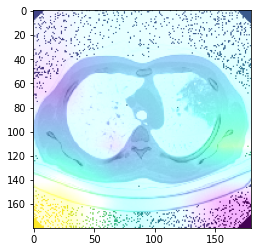

In [9]:
IMAGE_PATH = "datasets\\ct_scan_3\\val\\COVID-positive\\P021_106.png"
data = (mf.get_img_array(IMAGE_PATH, image_size), None)
grid = explainer.explain(data, partial_model, class_index=0, use_guided_grads=False)
plt.imshow(grid, cmap='binary')

In [19]:
image_size

(180, 180)

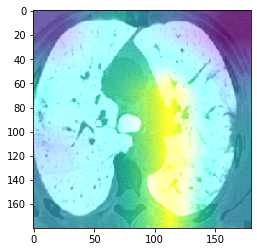

In [21]:
IMAGE_PATH = "datasets\\ct_scan_1\\datasetsSARS-COV-2 Ct-Scan\\COVID-positive\\Covid (400).png"
data = (mf.get_img_array(IMAGE_PATH, (image_size)), None)
grid = explainer.explain(data, partial_model, class_index=0, use_guided_grads=False)
plt.imshow(grid, cmap='binary')

In [31]:
img_array = mf.get_img_array(IMAGE_PATH, (image_size))
heatmap = mf.make_gradcam_heatmap(img_array, partial_model, last_conv_layer_name='conv_7b_ac', pred_index=None)
image = mf.build_gradcam(img_path=IMAGE_PATH, heatmap=heatmap, color_map='jet', original_image_colormap='grayscale', alpha=0.5)

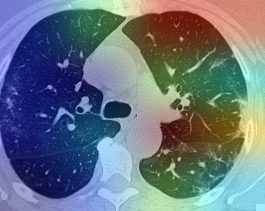

In [32]:
image

In [35]:
IMAGE_PATH = "datasets\\ct_scan_1\\datasetsSARS-COV-2 Ct-Scan\\COVID-positive\\Covid (1239).png"
img_array = mf.get_img_array(IMAGE_PATH, (image_size))
heatmap = mf.make_gradcam_heatmap(img_array, partial_model, last_conv_layer_name='conv_7b_ac', pred_index=None)
image = mf.build_gradcam(img_path=IMAGE_PATH, heatmap=heatmap, color_map='jet', original_image_colormap='grayscale', alpha=0.5)

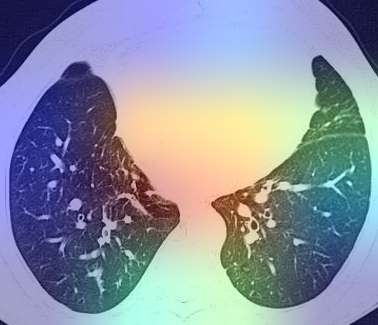

In [36]:
image

In [33]:
img_array = mf.get_img_array(IMAGE_PATH, (image_size))
heatmap = mf.make_gradcam_heatmap(img_array, full_model, last_conv_layer_name='conv_7b_ac', pred_index=None)
image = mf.build_gradcam(img_path=IMAGE_PATH, heatmap=heatmap, color_map='jet', original_image_colormap='grayscale', alpha=0.5)

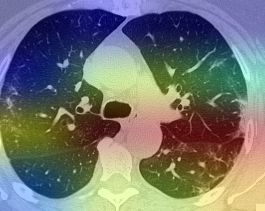

In [34]:
image

In [37]:
IMAGE_PATH = "datasets\\ct_scan_1\\datasetsSARS-COV-2 Ct-Scan\\COVID-positive\\Covid (1239).png"
img_array = mf.get_img_array(IMAGE_PATH, (image_size))
heatmap = mf.make_gradcam_heatmap(img_array, full_model, last_conv_layer_name='conv_7b_ac', pred_index=None)
image = mf.build_gradcam(img_path=IMAGE_PATH, heatmap=heatmap, color_map='jet', original_image_colormap='grayscale', alpha=0.5)

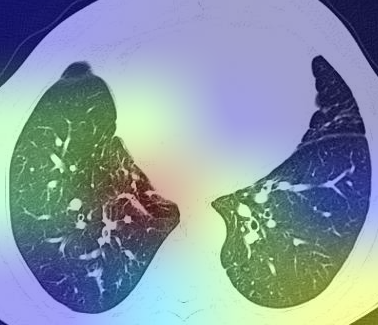

In [38]:
image

In [25]:
partial_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 180, 180, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 180, 180, 3)  0           sequential[0][0]                 
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 89, 89, 32)   864         rescaling[0][0]                  
______________________________________________________________________________________________

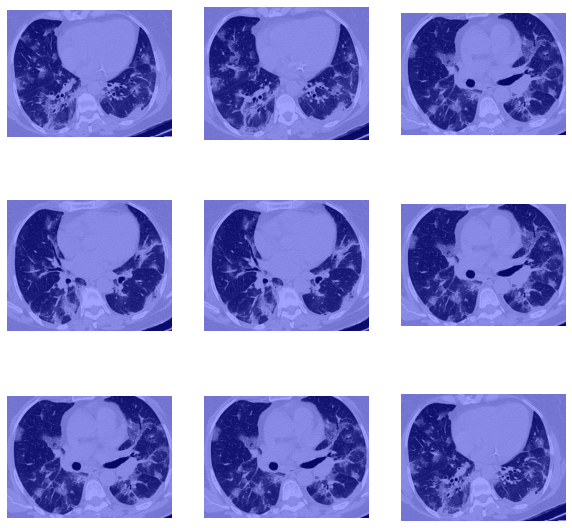

In [29]:
plt.figure(figsize=(10, 10))
end = False
for i in range(9):
  rand = random.randint(3, 9)
  ax = plt.subplot(3, 3, i + 1)
  img_path = "datasets/ct_scan_1/datasetsSARS-COV-2 Ct-Scan/COVID-positive/Covid ({}).png".format(rand)
  img_array = mf.get_img_array(img_path, size=image_size)
  superimposed_img = mf.superimpose_gradcam(img_path=img_path, 
                    image_size=image_size,
                    current_model=partial_model, 
                    grad_colormap='jet',
                    original_image_colormap='grayscale',
                    last_layer_grad_cam='conv_7b_ac')
  plt.imshow(superimposed_img)
  # plt.title('COVID-Negative ({})'.format(rand))
  plt.axis("off")

In [11]:
full_model = tf.keras.models.load_model('oficial_models/final_model_1')

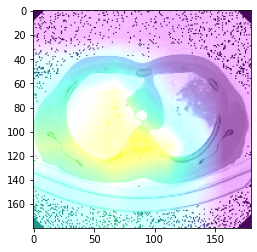

In [12]:
IMAGE_PATH = "datasets\\ct_scan_3\\val\\COVID-positive\\P021_106.png"
data = (mf.get_img_array(IMAGE_PATH, image_size), None)
grid = explainer.explain(data, full_model, class_index=0, use_guided_grads=False)
plt.imshow(grid, cmap='binary')

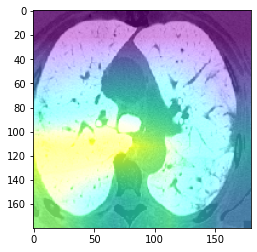

In [16]:
IMAGE_PATH = "datasets\\ct_scan_1\\datasetsSARS-COV-2 Ct-Scan\\COVID-positive\\Covid (400).png"
data = (mf.get_img_array(IMAGE_PATH, image_size), None)
grid = explainer.explain(data, full_model, class_index=0, use_guided_grads=False)
plt.imshow(grid, cmap='binary')

In [18]:
full_model.evaluate(val_ds)

83/83 [==============================] - 13s 122ms/step - loss: 0.2280 - accuracy: 0.9282


[0.22803619503974915, 0.9281914830207825]